0- Package Installation and Imports

In [1]:
pip install pyclustering

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

In [3]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

1 - CLUSTERING CAM DATASET

In [4]:
filename='CAM-dataset/datasetCam.csv'
separator=';'
dataCAM= pd.read_csv(filename, sep=separator)

In [5]:
dataCAM.head()

,source,destination,messageID,referencePositionLat,referencePositionLong,referencePositionAlt,simulationTime,isSpecialVehicle,causeCodeIfSpecial,stationType,Unnamed: 10
0,18,NaN,2,487669280,114602490,800001,0.659493,N,NaN,5,NaN
1,92,NaN,2,487659630,114599970,800001,0.786275,N,NaN,5,NaN
2,18,NaN,2,487669310,114602500,800001,0.859765,N,NaN,5,NaN
3,92,NaN,2,487659650,114599980,800001,0.986003,N,NaN,5,NaN
4,18,NaN,2,487669360,114602510,800001,1.159490,N,NaN,5,NaN


In [6]:
columnsname= ['source','referencePositionLat','referencePositionLong','referencePositionAlt']
data_position=dataCAM[columnsname].astype(float)

In [7]:
data_position.head()

,source,referencePositionLat,referencePositionLong,referencePositionAlt
0,18.0,487669280.0,114602490.0,800001.0
1,92.0,487659630.0,114599970.0,800001.0
2,18.0,487669310.0,114602500.0,800001.0
3,92.0,487659650.0,114599980.0,800001.0
4,18.0,487669360.0,114602510.0,800001.0


In [8]:
sample=data_position.values.tolist()
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(sample, amount_initial_centers).initialize()
xmeans_instance = xmeans(sample, initial_centers, 40)
xmeans_instance.process()
clusters1= xmeans_instance.get_clusters()
centroids1= xmeans_instance.get_centers()

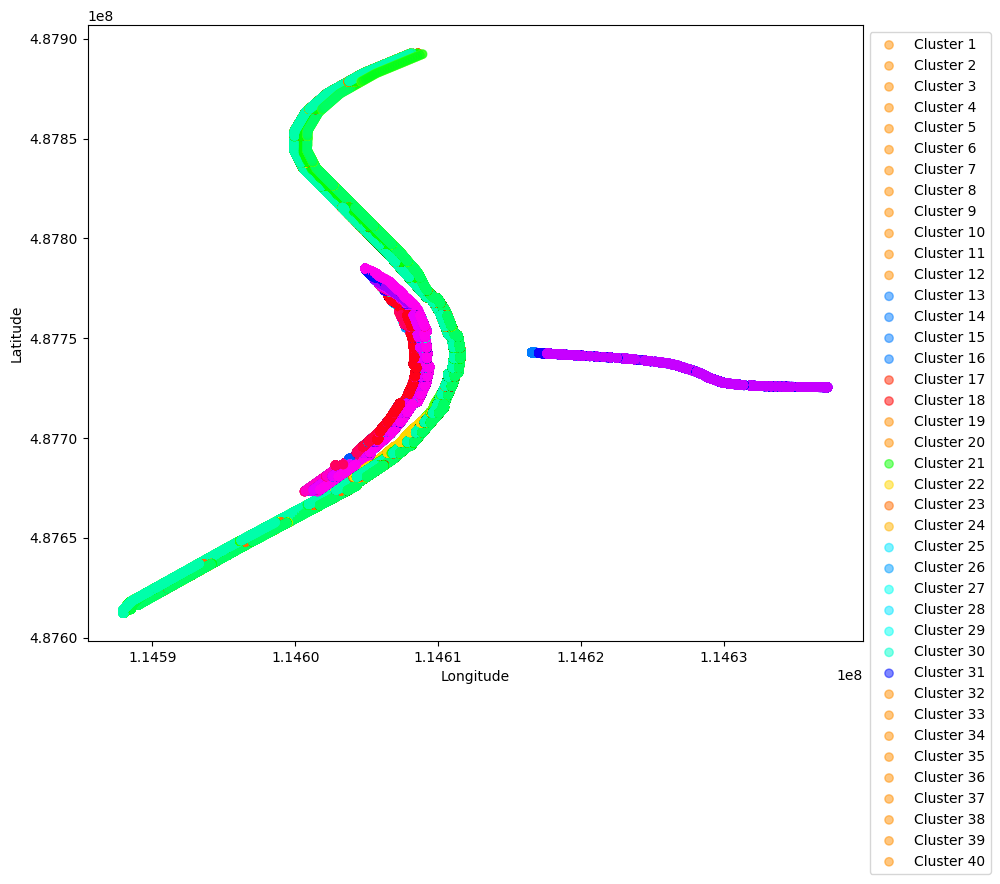

In [9]:
utils.plot_clustering(sample,clusters1)

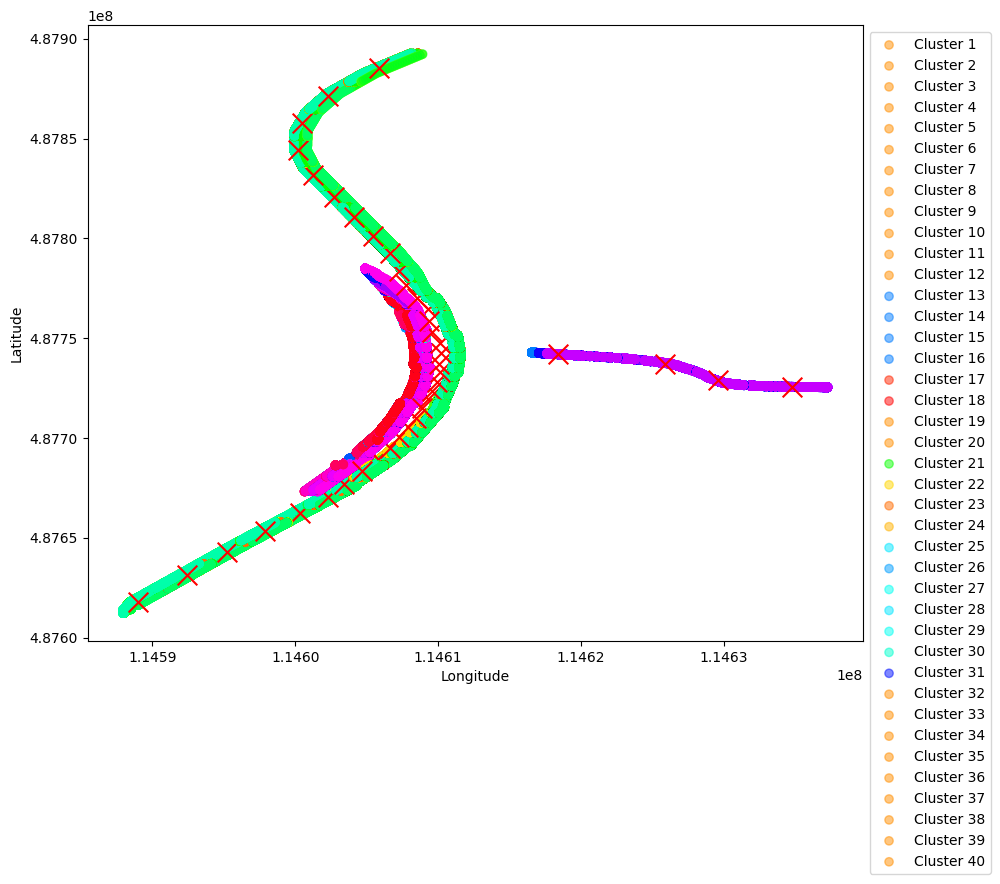

In [10]:
utils.plot_clustering_with_centroids(sample,clusters1,centroids1)

2 - CLUSTERING DENM DATASET

In [11]:
filename2='DENM-dataset/datasetDen.csv'
separator=';'
dataDENM= pd.read_csv(filename2, sep=separator)

In [12]:
dataDENM.head()

,source,destination,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,termination,stationType,Unnamed: 17
0,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
1,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
2,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
3,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
4,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN


In [13]:
columnsname2= ['source','eventPos_lat','eventPos_long','eventPos_alt']
data_position2=dataDENM[columnsname2].astype(float)

In [14]:
data_position2.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166.0,487672120.0,114603240.0,800001.0
1,166.0,487672120.0,114603240.0,800001.0
2,166.0,487672120.0,114603240.0,800001.0
3,166.0,487672120.0,114603240.0,800001.0
4,166.0,487672120.0,114603240.0,800001.0


In [15]:
sample2=data_position2.values.tolist()
amount_initial_centers2 = 2
initial_centers2 = kmeans_plusplus_initializer(sample2, amount_initial_centers2).initialize()
xmeans_instance2 = xmeans(sample2, initial_centers2, 40)
xmeans_instance2.process()
clusters2= xmeans_instance2.get_clusters()
centroids2= xmeans_instance2.get_centers()

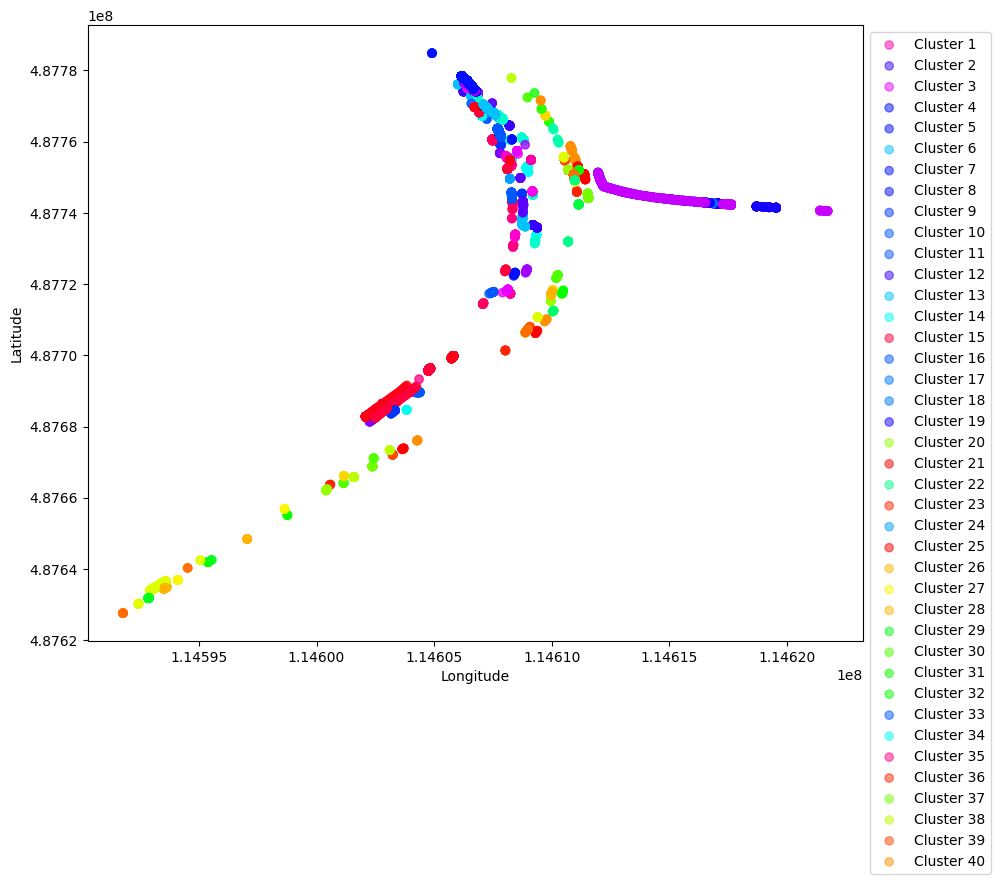

In [16]:
utils.plot_clustering(sample2,clusters2)

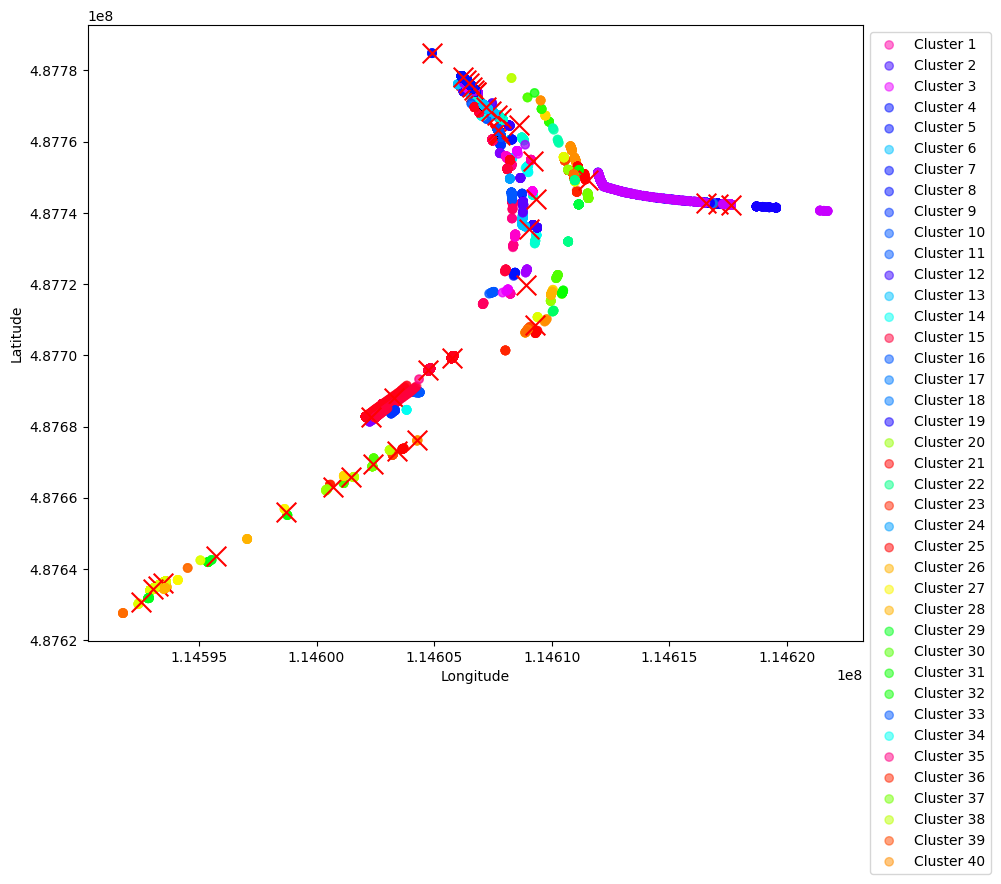

In [17]:
utils.plot_clustering_with_centroids(sample2,clusters2,centroids2)

Plotting the Clustering of Both Datasets

c:\Users\Acer\Dropbox\PC\Desktop\attivitaprogettuale\attprog_sec\utils.py:78: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data[:, 2], cluster_data[:, 1], c=cluster_color, alpha=0.5, label=f'Cluster 1-{i+1}')


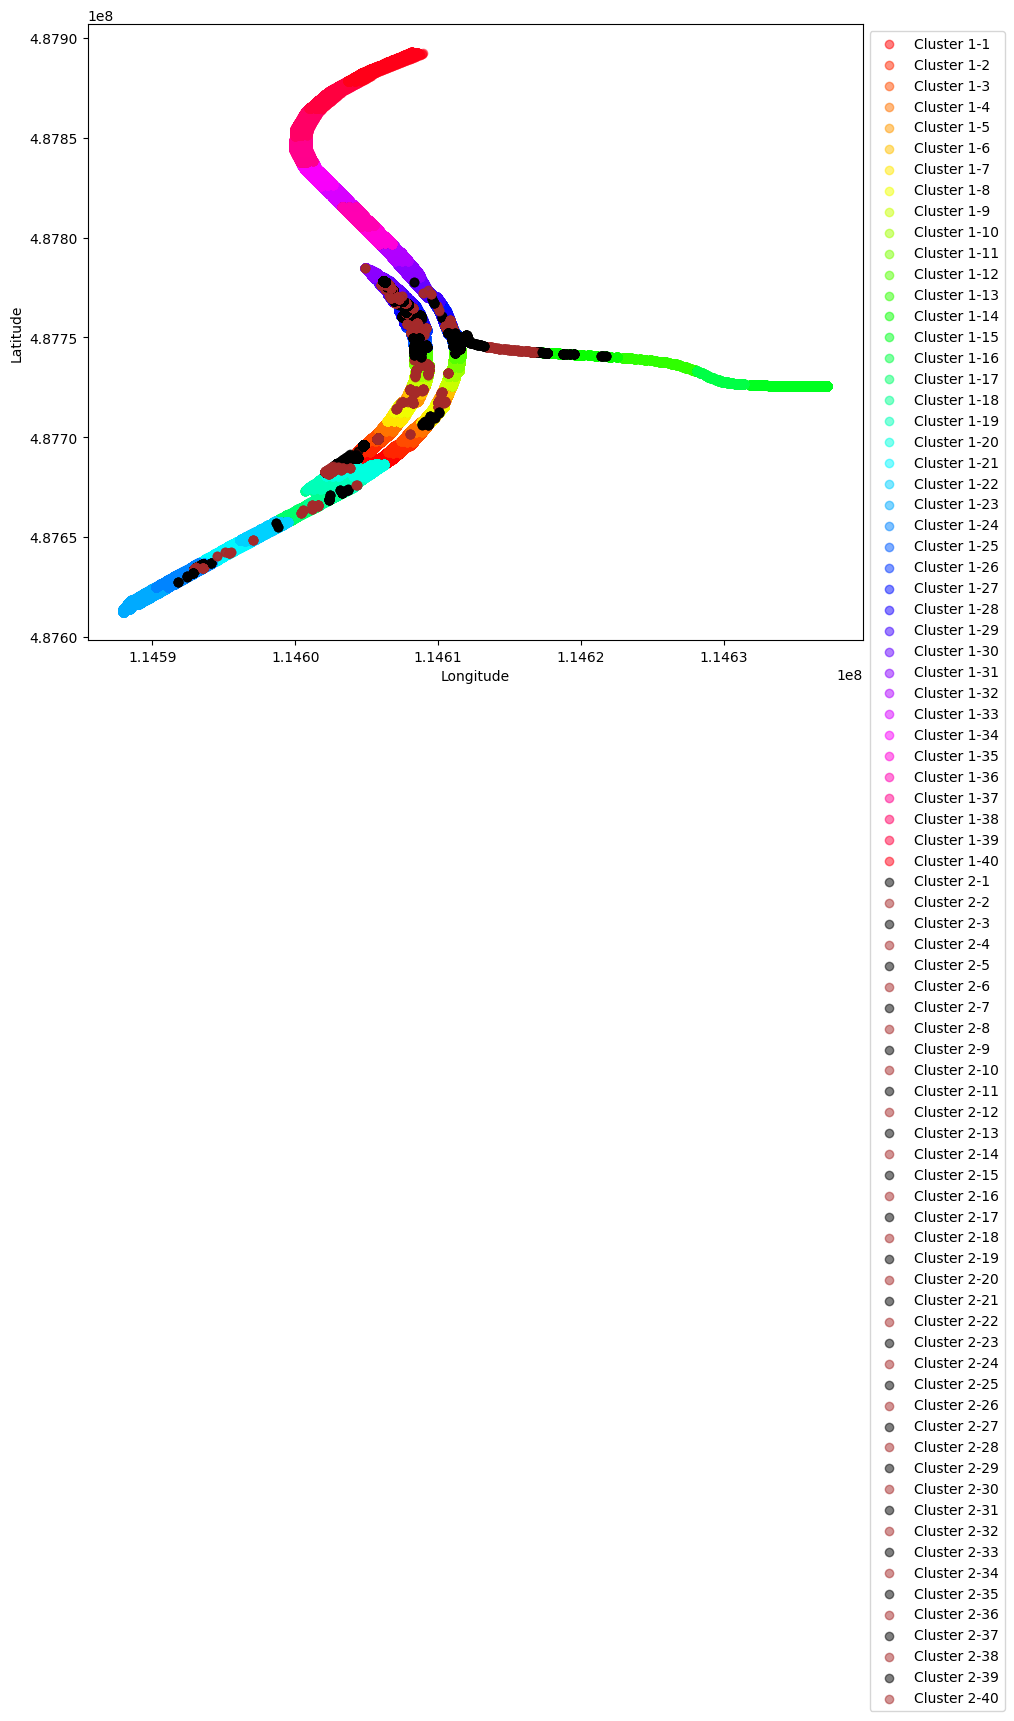

In [18]:
utils.plot_two(sample,sample2,clusters1,clusters2)

3 - CLUSTERING OF THE ENTIRE DENM DATASET

In [19]:
import struct

We need to perform the necessary conversions because certain fields are not in float format.
Additionally, we drop the NaN values.

In [20]:
def hex_to_float(hex_string):
    int_value = int(hex_string, 16)
    # Utilize the struct.unpack function to convert the integer into a float
    float_value = struct.unpack('f', struct.pack('I', int_value))[0]
    return float_value


In [21]:
dataDENM.head()

,source,destination,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,termination,stationType,Unnamed: 17
0,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
1,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
2,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
3,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
4,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN


In [22]:
column_nan=dataDENM.columns[dataDENM.isna().all()].tolist()
column_nan

['destination', 'termination', 'Unnamed: 17']

In [23]:
datadropped= dataDENM.drop(columns=column_nan)
datadropped

,source,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType
0,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
1,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
2,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
3,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
4,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,0x560b09d88bc0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595987,3052,1,3052:5258,1,1,0,1856,425563814200,425563814200,673.2740,487682610,114602500,800001,0x560b09c19c50,0
595988,3126,1,3126:5849,1,1,0,1856,425563873200,425563873200,673.3320,487682780,114602090,800001,0x560b0a191e30,0
595989,3052,1,3052:5848,1,1,0,1856,425563873200,425563873200,673.3340,487682610,114602500,800001,0x560b09b35ac0,0
595990,3126,1,3126:5260,1,1,0,1856,425563814300,425563814300,673.3920,487682780,114602090,800001,0x560b0a0d6320,0


In [24]:
#Convert the hexadecimal column to float
datadropped['relevanceDistance'] = datadropped['relevanceDistance'].apply(lambda x: int(x, 16)).astype(float)

In [25]:
datadropped.head()

,source,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType
0,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0
1,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0
2,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0
3,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0
4,166,1,166:1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0


In [26]:
#Creating two new columns to separate the ID.
datadropped[['Numero_ID', 'Identificatore']] = datadropped['actionID'].str.split(':', expand=True)

#Convert the 'Numero_ID' column to float.
datadropped['Numero_ID'] = datadropped['Numero_ID'].astype(float)
datadropped['Identificatore'] = datadropped['Identificatore'].astype(float)

In [27]:
datadropped= datadropped.drop(columns='actionID')

In [28]:
datadropped.head()

,source,messageID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType,Numero_ID,Identificatore
0,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0
1,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0
2,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0
3,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0
4,166,1,1,97,1229,80,425563207100,425563207100,7.1387,487672120,114603240,800001,9.460541e+13,0,166.0,1.0


In [29]:
datadropped =datadropped.astype(float)

In [30]:
datadropped.head()

,source,messageID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType,Numero_ID,Identificatore
0,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0
1,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0
2,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0
3,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0
4,166.0,1.0,1.0,97.0,1229.0,80.0,4.255632e+11,4.255632e+11,7.1387,487672120.0,114603240.0,800001.0,9.460541e+13,0.0,166.0,1.0


In [31]:
sample3=datadropped.values.tolist()
amount_initial_centers3 = 2
initial_centers3 = kmeans_plusplus_initializer(sample3, amount_initial_centers3).initialize()
xmeans_instance3 = xmeans(sample3, initial_centers3, 40)
xmeans_instance3.process()
clusters3= xmeans_instance3.get_clusters()
centroids3= xmeans_instance3.get_centers()

4- CLUSTERING OF THE ENTIRE CAM DATASET

In [32]:
dataCAM.head()

,source,destination,messageID,referencePositionLat,referencePositionLong,referencePositionAlt,simulationTime,isSpecialVehicle,causeCodeIfSpecial,stationType,Unnamed: 10
0,18,NaN,2,487669280,114602490,800001,0.659493,N,NaN,5,NaN
1,92,NaN,2,487659630,114599970,800001,0.786275,N,NaN,5,NaN
2,18,NaN,2,487669310,114602500,800001,0.859765,N,NaN,5,NaN
3,92,NaN,2,487659650,114599980,800001,0.986003,N,NaN,5,NaN
4,18,NaN,2,487669360,114602510,800001,1.159490,N,NaN,5,NaN


Drop the NaN values.

In [33]:
column_nanCAM=dataCAM.columns[dataCAM.isna().all()].tolist()
column_nanCAM

['destination', 'causeCodeIfSpecial', 'Unnamed: 10']

In [34]:
datadroppedCAM= dataCAM.drop(columns=column_nanCAM)
datadroppedCAM

,source,messageID,referencePositionLat,referencePositionLong,referencePositionAlt,simulationTime,isSpecialVehicle,stationType
0,18,2,487669280,114602490,800001,0.659493,N,5
1,92,2,487659630,114599970,800001,0.786275,N,5
2,18,2,487669310,114602500,800001,0.859765,N,5
3,92,2,487659650,114599980,800001,0.986003,N,5
4,18,2,487669360,114602510,800001,1.159490,N,5
...,...,...,...,...,...,...,...,...
368395,1276,2,487874420,114603610,800001,113.199000,N,5
368396,1128,2,487891780,114608740,800001,113.291000,N,5
368397,1276,2,487874950,114603740,800001,113.399000,N,5
368398,1128,2,487892300,114608920,800001,113.491000,N,5


The 'isSpecialVehicle' field is a boolean represented as a string value. To retain the meaning of these values, we apply the following conversion.

In [35]:
def letter_to_binary(letter):
    unicode_value = ord(letter)
    binary_representation = bin(unicode_value)[2:]  # Remove the prefix '0b'
    return binary_representation


In [36]:
datadroppedCAM['isSpecialVehicle'] = datadroppedCAM['isSpecialVehicle'].apply(letter_to_binary)


In [37]:
def binary_to_float(binary):
    decimal_value = int(binary, 2)
    return float(decimal_value)

In [38]:
datadroppedCAM['isSpecialVehicle'] = datadroppedCAM['isSpecialVehicle'].apply(binary_to_float)

In [39]:
datadroppedCAM.head()

,source,messageID,referencePositionLat,referencePositionLong,referencePositionAlt,simulationTime,isSpecialVehicle,stationType
0,18,2,487669280,114602490,800001,0.659493,78.0,5
1,92,2,487659630,114599970,800001,0.786275,78.0,5
2,18,2,487669310,114602500,800001,0.859765,78.0,5
3,92,2,487659650,114599980,800001,0.986003,78.0,5
4,18,2,487669360,114602510,800001,1.159490,78.0,5


In [40]:
datadroppedCAM =datadroppedCAM.astype(float)

In [41]:
sample4=datadroppedCAM.values.tolist()
amount_initial_centers4 = 2
initial_centers4 = kmeans_plusplus_initializer(sample4, amount_initial_centers4).initialize()
xmeans_instance4 = xmeans(sample4, initial_centers4, 20)
xmeans_instance4.process()
clusters4= xmeans_instance4.get_clusters()
centroids4= xmeans_instance4.get_centers()

5- Clustering performed considering the event type as a relevance parameter

In [42]:
columnsnameEVENT= ['source','eventPos_lat','eventPos_long','eventPos_alt', 'situation_eventType']
data_positionEVENT=dataDENM[columnsnameEVENT].astype(float)

In [43]:
sampleE=data_positionEVENT.values.tolist()
amount_initial_centersE = 2
initial_centersE = kmeans_plusplus_initializer(sampleE, amount_initial_centersE).initialize()
xmeans_instanceE = xmeans(sampleE, initial_centersE, 3)
xmeans_instanceE.process()
clustersE= xmeans_instanceE.get_clusters()
centroidsE= xmeans_instanceE.get_centers()

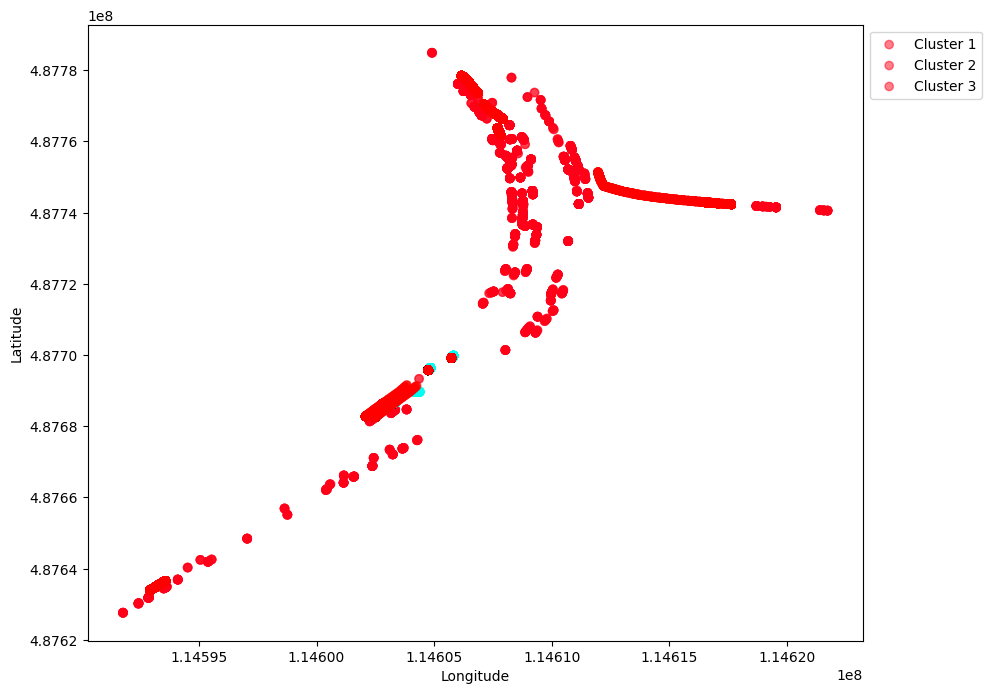

In [44]:
utils.plot_clustering_event(sampleE,clustersE)

6- Contamination of the DENM dataset

In [45]:
columnsdirty= ['source','eventPos_lat','eventPos_long','eventPos_alt']
datadirty=dataDENM[columnsdirty]

In [46]:
datadirty.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166,487672120,114603240,800001
1,166,487672120,114603240,800001
2,166,487672120,114603240,800001
3,166,487672120,114603240,800001
4,166,487672120,114603240,800001


In [47]:

# Function to Calculate New Coordinates (Latitude and Longitude) Given Starting Coordinates
def nuove_coordinate(latitudine, longitudine):
    mean = 0  # Mean of the Gaussian Distribution
    std_deviation = 1
    variazione_metri = np.random.normal(mean, std_deviation) * 100  
    metri_per_grado_lat = 111320.0 
    metri_per_grado_long = 111320.0 * np.cos(np.radians(latitudine/1e7)) 
    variazione_gradi = variazione_metri / metri_per_grado_lat
    variazione_gradi_long = variazione_metri / metri_per_grado_long
  
    # Calculate the new coordinates
    nuova_latitudine = round(latitudine + variazione_gradi*1e7)
    nuova_longitudine = round(longitudine + variazione_gradi_long*1e7)

    return nuova_latitudine, nuova_longitudine

NOTE: Please adjust the 'mul' parameter according to the dataset's size.

In [48]:
mul = 1

In [49]:
#Coordinate modification every 1000th *mul entry
counter= 0
for i in range(0, len(datadirty)-1, 10000*mul):
    lat = datadirty.loc[i, 'eventPos_lat']
    long = datadirty.loc[i, 'eventPos_long']
    counter= counter+1

    nuova_lat, nuova_long = nuove_coordinate(lat, long) 

    datadirty.loc[i, 'eventPos_lat'] = nuova_lat 
    datadirty.loc[i, 'eventPos_long'] = nuova_long 
    print(nuova_lat ,'latitudine,' ,nuova_long ,'longitudine')
print(counter) #to see how many entries have been modified

487690674 latitudine, 114631390 longitudine
487631351 latitudine, 114586453 longitudine
487630655 latitudine, 114587415 longitudine
487616193 latitudine, 114563260 longitudine
487631156 latitudine, 114585585 longitudine
487634744 latitudine, 114591601 longitudine
487750220 latitudine, 114588432 longitudine
487774454 latitudine, 114618974 longitudine
487768105 latitudine, 114606138 longitudine
487774886 latitudine, 114605536 longitudine
487774763 latitudine, 114626273 longitudine
487755029 latitudine, 114596327 longitudine
487781876 latitudine, 114626546 longitudine
487757157 latitudine, 114598231 longitudine
487766000 latitudine, 114612975 longitudine
487774916 latitudine, 114626505 longitudine
487755748 latitudine, 114573842 longitudine
487779829 latitudine, 114611709 longitudine
487768889 latitudine, 114608334 longitudine
487793413 latitudine, 114642062 longitudine
487757668 latitudine, 114601419 longitudine
487760462 latitudine, 114597308 longitudine
487759190 latitudine, 114603728 

C:\Users\Acer\AppData\Local\Temp\ipykernel_17500\3005614536.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadirty.loc[i, 'eventPos_lat'] = nuova_lat
C:\Users\Acer\AppData\Local\Temp\ipykernel_17500\3005614536.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadirty.loc[i, 'eventPos_long'] = nuova_long


In [50]:
pd.set_option('display.float_format', '{:.6f}'.format)

datadirty.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166,487690674,114631390,800001
1,166,487672120,114603240,800001
2,166,487672120,114603240,800001
3,166,487672120,114603240,800001
4,166,487672120,114603240,800001


In [51]:
'''
 counter = 0
for i in np.arange(0,590000,200):
  counter+= 1
  
  print(datadirty.iloc[i])
print(counter)
'''

'\n counter = 0\nfor i in np.arange(0,590000,200):\n  counter+= 1\n  \n  print(datadirty.iloc[i])\nprint(counter)\n'

In [52]:
data_positionDIRTY=datadirty.astype(float) 

In [53]:
data_positionDIRTY.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166.000000,487690674.000000,114631390.000000,800001.000000
1,166.000000,487672120.000000,114603240.000000,800001.000000
2,166.000000,487672120.000000,114603240.000000,800001.000000
3,166.000000,487672120.000000,114603240.000000,800001.000000
4,166.000000,487672120.000000,114603240.000000,800001.000000


In [54]:
sampleD=data_positionDIRTY.values.tolist()
amount_initial_centersD = 2
initial_centersD = kmeans_plusplus_initializer(sampleD, amount_initial_centersD).initialize()
xmeans_instanceD = xmeans(sampleD, initial_centersD,40)
xmeans_instanceD.process()
clustersD= xmeans_instanceD.get_clusters()
centroidsD= xmeans_instanceD.get_centers()

In [55]:
dataset = datadropped.copy()
dataset = dataset.drop(columns='Numero_ID')
dataset = dataset.drop(columns='Identificatore')
dataset['eventPos_lat'] = datadirty['eventPos_lat']
dataset['eventPos_long'] = datadirty['eventPos_long']
dataset.to_csv('dataset_denm_dirty.csv', index=False)  # save the corrupted dataset

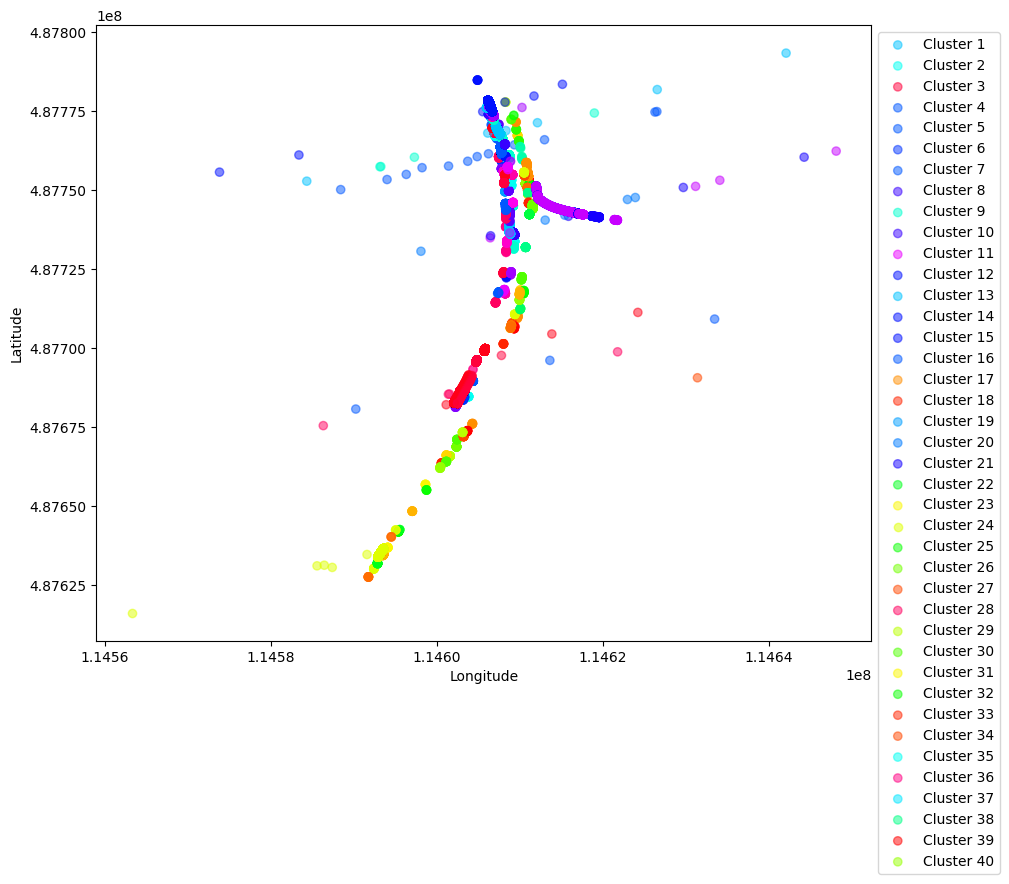

In [56]:
utils.plot_clustering(sampleD,clustersD)

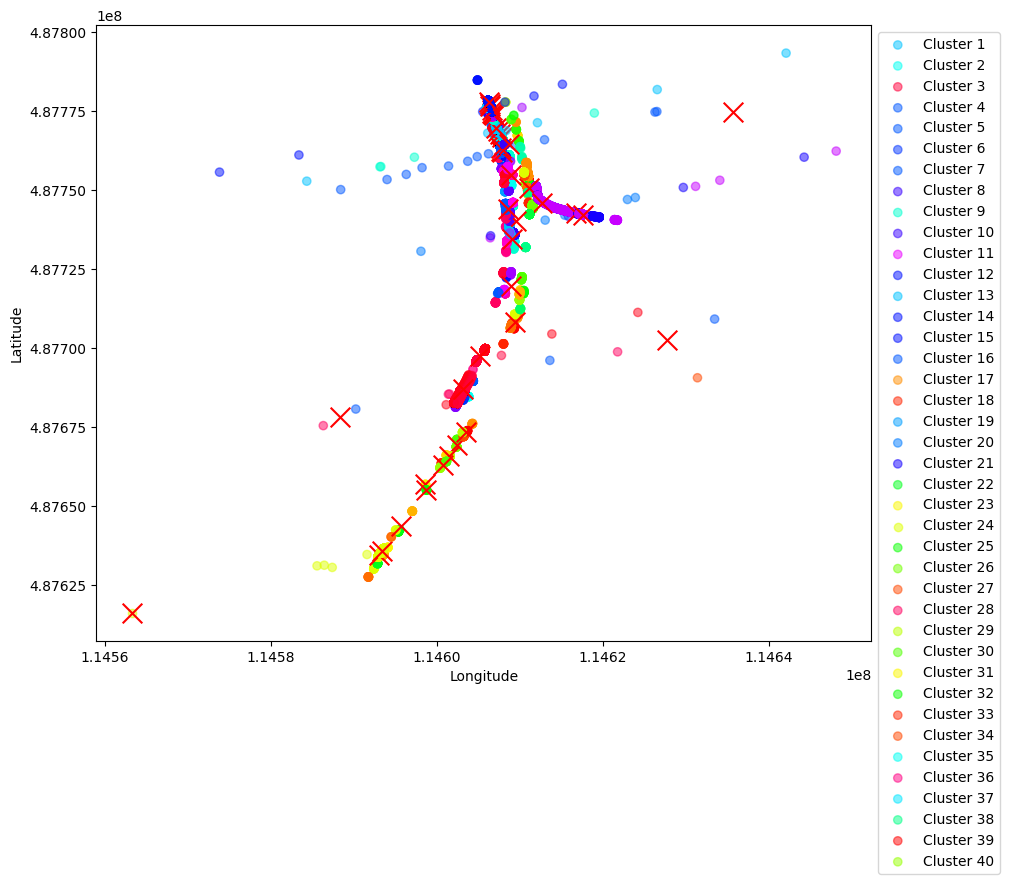

In [57]:
utils.plot_clustering_with_centroids(sampleD,clustersD,centroidsD)

7- Clustering of RSU data

In [58]:
filename='datasetCamRSU.csv'
separator=';'
dataCAM_RSU= pd.read_csv(filename, sep=separator)

In [59]:
columnsnameRSU= ['source','referencePositionLat','referencePositionLong','referencePositionAlt']
data_position_RSU=dataCAM_RSU[columnsnameRSU].astype(float)

In [60]:
sampleRSU=data_position_RSU.values.tolist()
amount_initial_centersR = 2
initial_centersR = kmeans_plusplus_initializer(sampleRSU, amount_initial_centersR).initialize()
xmeans_instanceRSU = xmeans(sampleRSU, initial_centersR, 20)
xmeans_instanceRSU.process()
clustersRSU= xmeans_instanceRSU.get_clusters()
centroidsRSU= xmeans_instanceRSU.get_centers()

8- Clean the dataset based on time parameters

In [61]:
dataDENM.head()

,source,destination,messageID,actionID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,termination,stationType,Unnamed: 17
0,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
1,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
2,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
3,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN
4,166,NaN,1,166:1,1,97,1229,80,425563207100,425563207100,7.138700,487672120,114603240,800001,0x560b09d88bc0,NaN,0,NaN


In [62]:
timecolumns = ['source', 'situation_informationQ', 'situation_eventType', 'detection_time', 'reference_time', 'simulation_time',	'eventPos_lat', 'eventPos_long', 'eventPos_alt']
datatimeDENM = dataDENM[timecolumns]

In [63]:
datatimeDENM.head()

,source,situation_informationQ,situation_eventType,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt
0,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001
1,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001
2,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001
3,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001
4,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001


In [64]:
tmcolumns = ['source', 'referencePositionLat',	'referencePositionLong',	'referencePositionAlt',	'simulationTime']
datatimeCAM = dataCAM[tmcolumns]

In [65]:
 # 1. SimTime starts from zero, we need it in ms TAI format
from datetime import datetime
import v2v

tai_sync = datetime.strptime('2004-01-01 00:00:00', '%Y-%m-%d %H:%M:%S') 
# The former value is usually based on your local timezone. We need to convert to UTC as the time used in the dataset
utc_tai_sync = datetime.utcfromtimestamp(tai_sync.timestamp()) 
temp_start_time = datetime.strptime('2017-06-26 12:00:00', '%Y-%m-%d %H:%M:%S')
new_start_time = (temp_start_time.timestamp()*1000) - (utc_tai_sync.timestamp() * 1000) 
datatimeDENM['message_reception_time'] =  (datatimeDENM['simulation_time']*1000) + new_start_time
datatimeCAM['message_reception_time'] =  (datatimeCAM['simulationTime']*1000) + new_start_time

C:\Users\Acer\AppData\Local\Temp\ipykernel_17500\2761496625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatimeDENM['message_reception_time'] =  (datatimeDENM['simulation_time']*1000) + new_start_time
C:\Users\Acer\AppData\Local\Temp\ipykernel_17500\2761496625.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatimeCAM['message_reception_time'] =  (datatimeCAM['simulationTime']*1000) + new_start_time


In [66]:
datatimeDENM.head()


,source,situation_informationQ,situation_eventType,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,message_reception_time
0,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012
1,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012
2,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012
3,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012
4,166,1,97,425563207100,425563207100,7.138700,487672120,114603240,800001,425563207138.700012


In [67]:
datatimeDENM = datatimeDENM.sort_values(by=['message_reception_time'])
datatimeCAM = datatimeCAM.sort_values(by=['message_reception_time'])

In [68]:

import math
def calcola_distanza(lat1, lon1, lat2, lon2):
    raggio_terrestre = 6371.0
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    delta_lat = lat2 - lat1
    delta_lon = lon2 - lon1
    a = math.sin(delta_lat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(delta_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distanza = raggio_terrestre * c

    return distanza

In [69]:
def trova_valore_piu_vicino(cam_data, target_simulation_time):
    cam_data['time_difference'] = np.abs(cam_data['simulationTime'] - target_simulation_time)
    valore_piu_vicino = cam_data.loc[cam_data['time_difference'].idxmin()]

    return valore_piu_vicino['simulationTime']

In [70]:
def calculate_spatial_differences(row):
    cam_data = datatimeCAM[datatimeCAM['source'] == row['source']]
    if not cam_data.empty:
          matching_rows = cam_data[cam_data['simulationTime']== trova_valore_piu_vicino(cam_data, row['simulation_time'])]
    if not matching_rows.empty:
            message = matching_rows.iloc[0]
    else:
            message = None
    if not message.empty:
            row['spatial_differences'] = [calcola_distanza(message['referencePositionLat'], message['referencePositionLong'], row['eventPos_lat'], row['eventPos_long'])]
    else:
        row['spatial_differences'] = [None]
    return row

denm_modified = datatimeDENM.apply(calculate_spatial_differences, axis=1)

In [71]:
denm_modified.head()

,source,situation_informationQ,situation_eventType,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,message_reception_time,spatial_differences
0,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,[12293.03965990235]
1,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,[12293.03965990235]
2,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,[12293.03965990235]
3,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,[12293.03965990235]
4,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,[12293.03965990235]


In [72]:
denm_modified['differenza_tempo'] = (denm_modified['message_reception_time'] - denm_modified['detection_time'])

In [73]:
denm_modified['spatial_differences'] = denm_modified['spatial_differences'].apply(lambda x: float(x[0]))

In [74]:
denm_modified.head()

,source,situation_informationQ,situation_eventType,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,message_reception_time,spatial_differences,differenza_tempo
0,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,12293.039660,38.700012
1,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,12293.039660,38.700012
2,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,12293.039660,38.700012
3,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,12293.039660,38.700012
4,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,12293.039660,38.700012


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


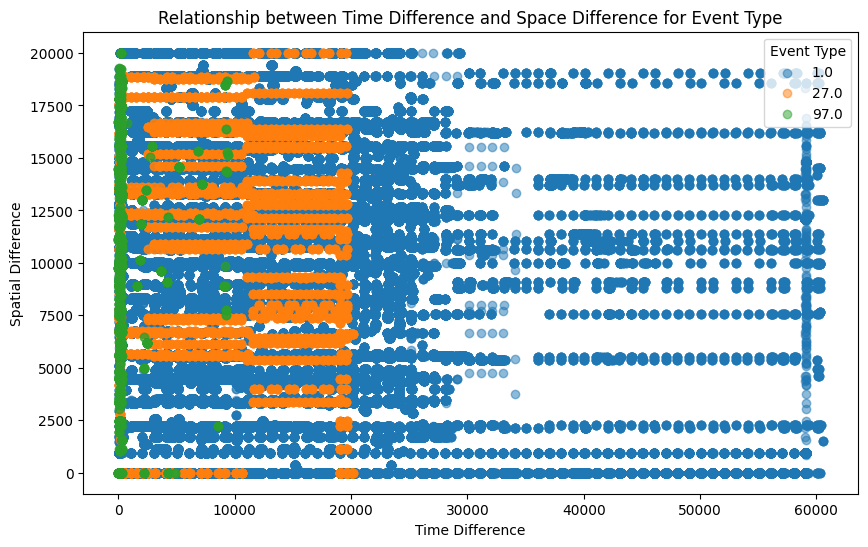

In [75]:

grouped_data_time = denm_modified.groupby('situation_eventType')['differenza_tempo']

grouped_data_space = denm_modified.groupby('situation_eventType')['spatial_differences']

plt.figure(figsize=(10, 6))
for group_name, group_time in grouped_data_time:
    group_space = grouped_data_space.get_group(group_name)
    plt.scatter(group_time, group_space, label=group_name, alpha=0.5)

plt.title('Relationship between Time Difference and Space Difference for Event Type')
plt.xlabel('Time Difference')
plt.ylabel('Spatial Difference')
plt.legend(title='Event Type')

plt.show()


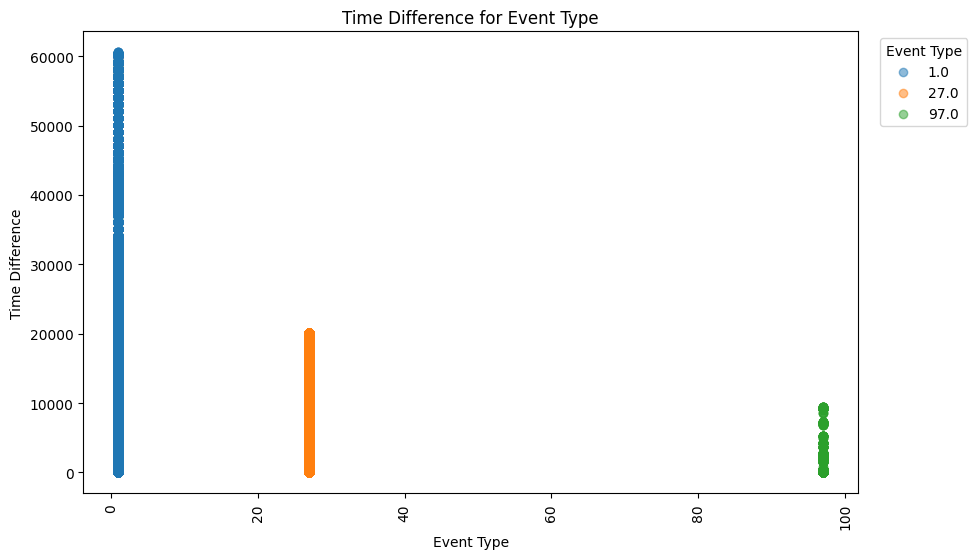

In [76]:
# time difference

grouped_data_time = denm_modified.groupby('situation_eventType')['differenza_tempo']

plt.figure(figsize=(10, 6))

for group_name, group_time in grouped_data_time:
    plt.scatter([group_name] * len(group_time), group_time, label=group_name, alpha=0.5)

plt.title('Time Difference for Event Type')
plt.xlabel('Event Type')
plt.ylabel('Time Difference')
plt.xticks(rotation=90)
plt.legend(title='Event Type')
plt.legend(title='Event Type', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


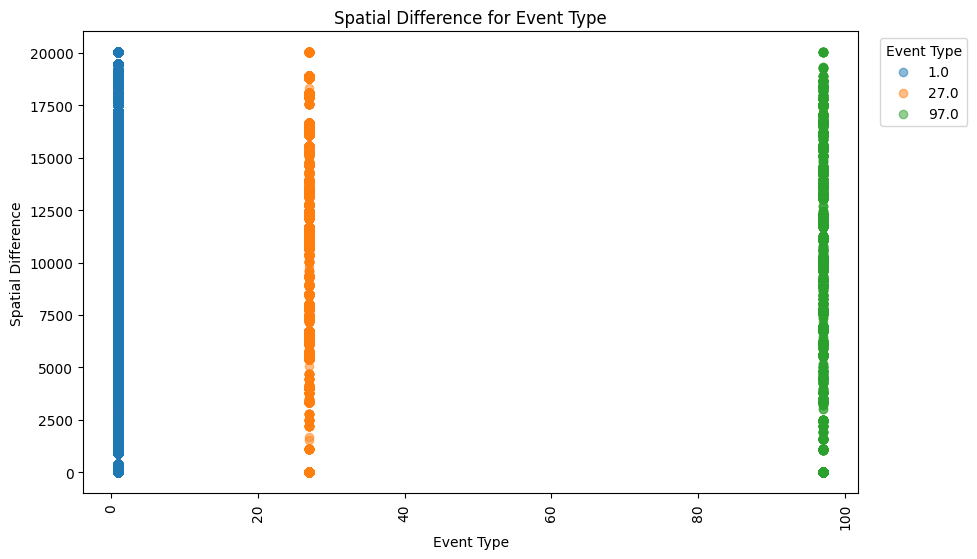

In [77]:
# spatial difference

grouped_data_space = denm_modified.groupby('situation_eventType')['spatial_differences']

plt.figure(figsize=(10, 6))

for group_name, group_space in grouped_data_space:
    plt.scatter([group_name] * len(group_space), group_space, label=group_name, alpha=0.5)

plt.title('Spatial Difference for Event Type')
plt.xlabel('Event Type')
plt.ylabel('Spatial Difference')
plt.xticks(rotation=90)
plt.legend(title='Event Type')
plt.legend(title='Event Type', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


Data Check: How many vehicles report the different events?

1:

In [78]:
analyzed_sources = set()
counter = 0

for index, row in denm_modified.iterrows():
    source = row['source']
    situation_eventType = row['situation_eventType']
    
    # Check if the source has not been previously analyzed and situation_eventType is equal to 1.
    if source not in analyzed_sources and situation_eventType == 1:
        counter += 1
        analyzed_sources.add(source)

print(f"Number of entries with different sources and situation_eventType equal to 1: {counter}")


Number of entries with different sources and situation_eventType equal to 1: 12


27:

In [79]:
analyzed_sources = set()
counter = 0

for index, row in denm_modified.iterrows():
    source = row['source']
    situation_eventType = row['situation_eventType']
    
    #Check if the source has not been previously analyzed and situation_eventType is equal to 27.
    if source not in analyzed_sources and situation_eventType == 27:
        counter += 1
        analyzed_sources.add(source)

print(f"Number of entries with different sources and situation_eventType equal to 27: {counter}")


Number of entries with different sources and situation_eventType equal to 27: 4


97:

In [80]:
analyzed_sources = set()
counter = 0

for index, row in denm_modified.iterrows():
    source = row['source']
    situation_eventType = row['situation_eventType']
    
    #Check if the source has not been previously analyzed and situation_eventType is equal to 97.
    if source not in analyzed_sources and situation_eventType == 97:
        counter += 1
        analyzed_sources.add(source)

print(f"Number of entries with different sources and situation_eventType equal to 97: {counter}")


Number of entries with different sources and situation_eventType equal to 97: 43


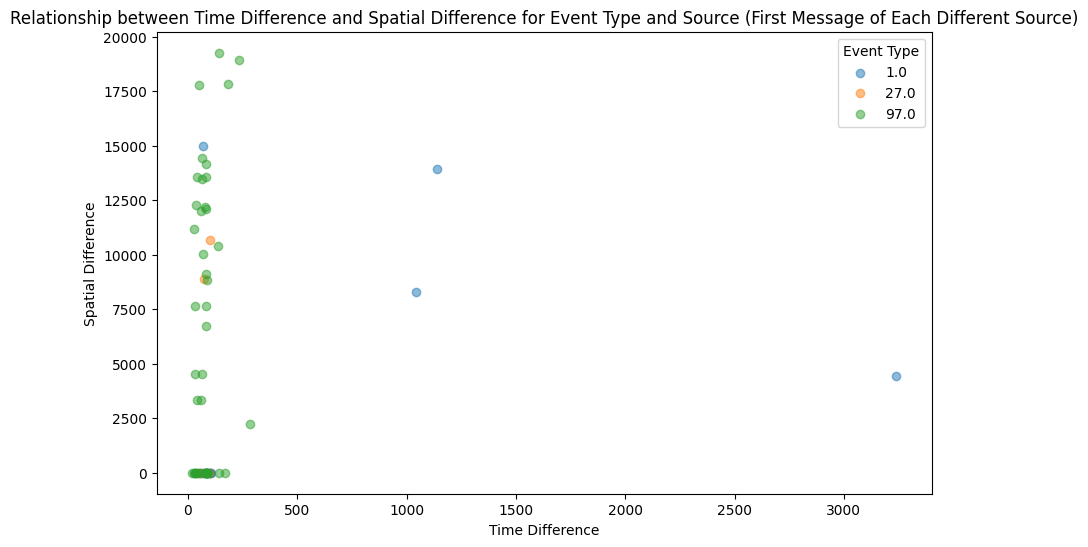

In [81]:
denm_sorted = denm_modified.sort_values(by='message_reception_time')

unique_sources = denm_sorted.drop_duplicates(subset=['source', 'situation_eventType'], keep='first')


plt.figure(figsize=(10, 6))

unique_event_types = sorted(unique_sources['situation_eventType'].unique())

# Plot the data with colors assigned based on the ascending order of event type
for event_type in unique_event_types:
    filtered_data = unique_sources[unique_sources['situation_eventType'] == event_type]
    plt.scatter(filtered_data['differenza_tempo'], filtered_data['spatial_differences'], label=f'{event_type}', alpha=0.5)


plt.title('Relationship between Time Difference and Spatial Difference for Event Type and Source (First Message of Each Different Source)')
plt.xlabel('Time Difference')
plt.ylabel('Spatial Difference')
plt.legend(title='Event Type')
plt.show()


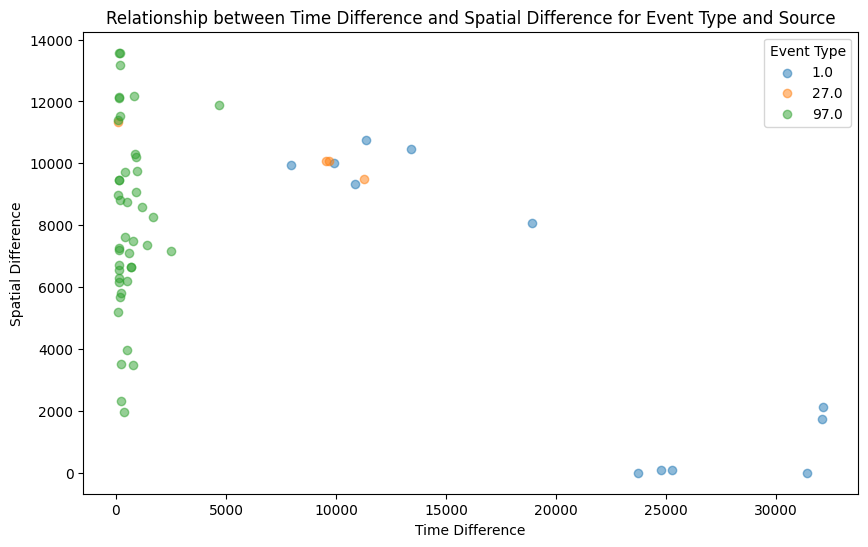

In [82]:
#We group the messages by source and event type, 
#and for each message with the same source and event type, we calculate the average of the values. 

grouped_data = denm_modified.groupby(['source','situation_eventType']).mean().reset_index()
grouped_data_time = grouped_data.groupby(['situation_eventType'])['differenza_tempo']
grouped_data_space = grouped_data.groupby(['situation_eventType'])['spatial_differences']
plt.figure(figsize=(10, 6))
for (event_type), group_time in grouped_data_time:
    group_space = grouped_data_space.get_group((event_type))
    plt.scatter(group_time, group_space, label=f'{event_type}', alpha=0.5)
plt.title('Relationship between Time Difference and Spatial Difference for Event Type and Source')
plt.xlabel('Time Difference')
plt.ylabel('Spatial Difference')
plt.legend(title='Event Type')
plt.show()


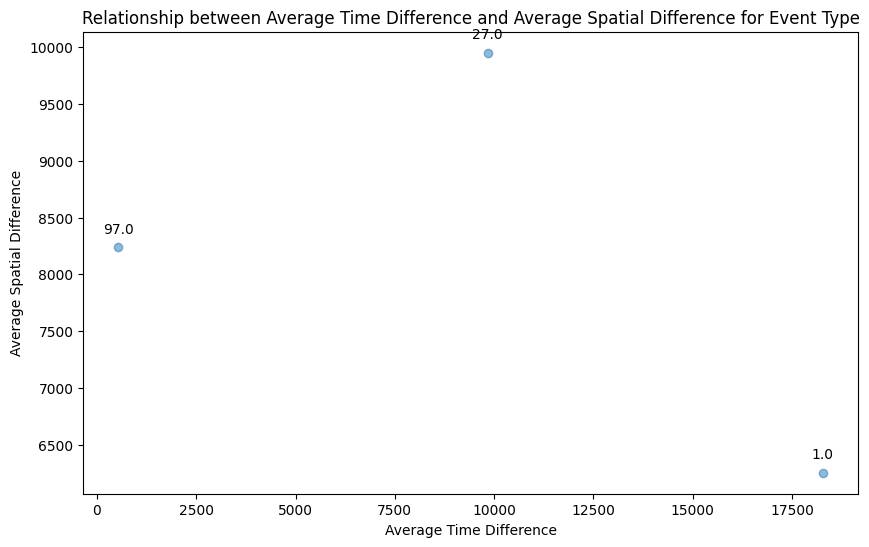

In [83]:
grouped_data_time = denm_modified.groupby('situation_eventType')['differenza_tempo'].mean()
grouped_data_space = denm_modified.groupby('situation_eventType')['spatial_differences'].mean()

mean_time = grouped_data_time.values
mean_space = grouped_data_space.values

plt.figure(figsize=(10, 6))
plt.scatter(mean_time, mean_space, alpha=0.5)

for group_name, x, y in zip(grouped_data_time.index, mean_time, mean_space):
    plt.annotate(group_name, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Relationship between Average Time Difference and Average Spatial Difference for Event Type')
plt.xlabel('Average Time Difference')
plt.ylabel('Average Spatial Difference')

plt.show()


In [84]:
datatimeDENM= datatimeDENM.loc[datatimeDENM['situation_informationQ'] > 0.6]

Investigating the most significant cluster, the one with situation_eventType = 97.

In [85]:
filtered_data = denm_modified[denm_modified['situation_eventType'] == 97]

In [86]:
data_position_time = filtered_data.astype(float)

In [87]:

sampletime=data_position_time.values.tolist()
#print(len(sampletime))
amount_initial_centerst = 1
initial_centerst = kmeans_plusplus_initializer(sampletime, amount_initial_centerst).initialize()
xmeans_instancetime = xmeans(sampletime, initial_centerst, 1)
xmeans_instancetime.process()
clusterstime= xmeans_instancetime.get_clusters()
centroidstime= xmeans_instancetime.get_centers()


8241.994680546777 : spatial difference centroid; 540.8018954432654 : time difference centroid


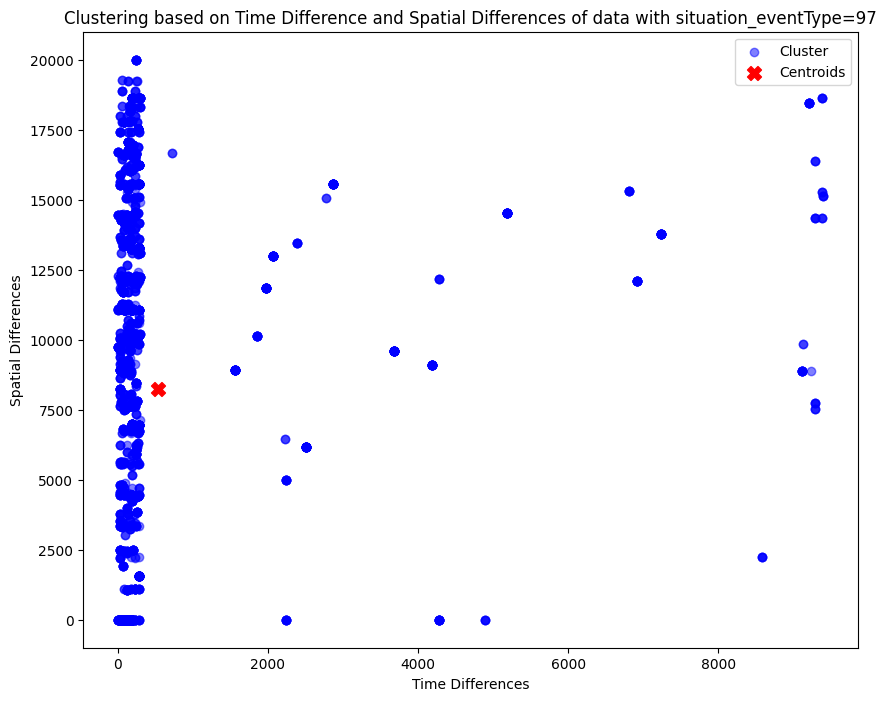

In [88]:
cluster_coords = []
centroid_coords = []

for cluster in clusterstime:
    cluster_points = [sampletime[i] for i in cluster]
    cluster_coords.append(cluster_points)

fig, ax = plt.subplots(figsize=(10, 8))

x = [point[11] for point in sampletime]
y = [point[10] for point in sampletime]

ax.scatter(x, y, c='blue', alpha=0.5, label=f'Cluster')
print(centroidstime[0][10], ': spatial difference centroid;', centroidstime[0][11], ': time difference centroid')
# Plot centroids
centroid_x = [point[11] for point in centroidstime]
centroid_y = [point[10] for point in centroidstime]
ax.scatter(centroid_x, centroid_y, c='red', marker='X', s=100, label='Centroids')


plt.xlabel('Time Differences')
plt.ylabel('Spatial Differences')
plt.title('Clustering based on Time Difference and Spatial Differences of data with situation_eventType=97')
plt.legend()
plt.show()


Clustering similar to the previous one, but calculated by averaging data with the same source.

In [89]:
grouped = denm_modified.groupby(['source','situation_eventType']).mean().reset_index()

In [90]:
grouped_filtered = grouped[grouped['situation_eventType'] == 97]

In [91]:
data_position_grouped = grouped_filtered.astype(float)

In [92]:
samplegrouped=data_position_grouped.values.tolist()
amount_initial_centersgrouped = 1
initial_centersgrouped = kmeans_plusplus_initializer(samplegrouped, amount_initial_centersgrouped).initialize()
xmeans_instancegrouped = xmeans(samplegrouped, initial_centersgrouped, 1)
xmeans_instancegrouped.process()
clustersgrouped= xmeans_instancegrouped.get_clusters()
centroidsgrouped= xmeans_instancegrouped.get_centers()

8170.01861974377 : spatial difference centroid; 592.7463814830859 : time difference centroid


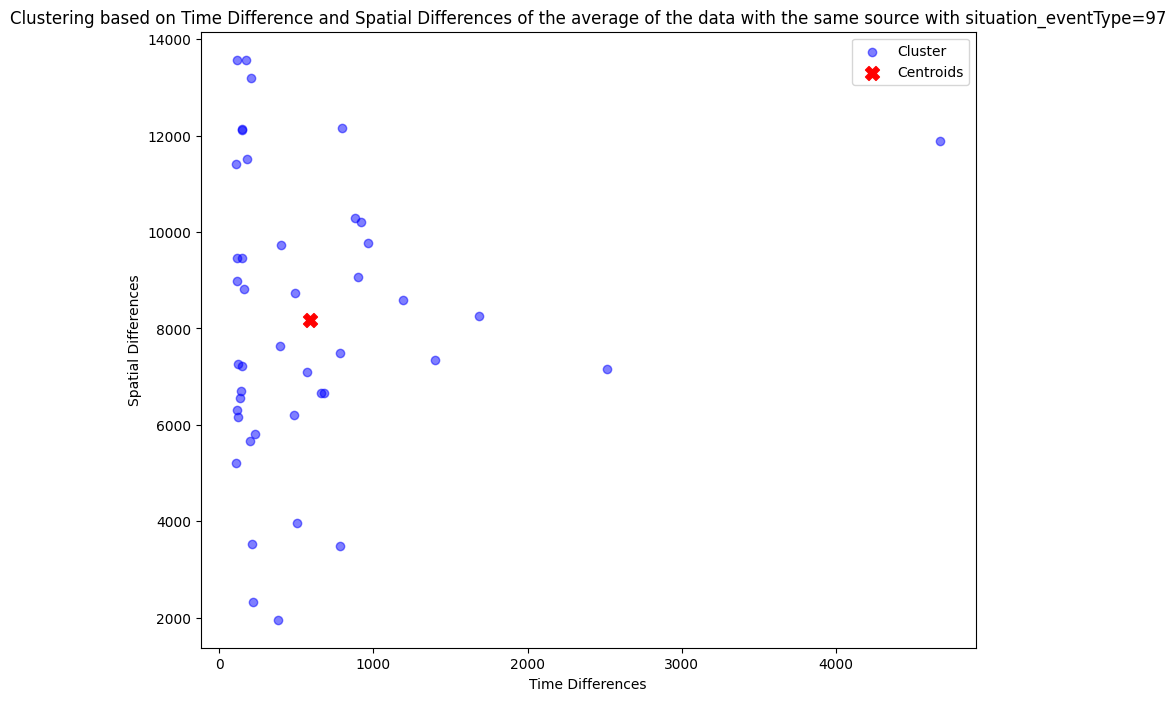

In [93]:
cluster_coords = []
centroid_coords = []

for cluster in clustersgrouped:
    cluster_coords.append([samplegrouped[i] for i in cluster])

fig, ax = plt.subplots(figsize=(10, 8))

x = [point[11] for point in samplegrouped]
y = [point[10] for point in samplegrouped]
ax.scatter(x, y, c='blue', alpha=0.5, label=f'Cluster')
print(centroidsgrouped[0][10], ': spatial difference centroid;', centroidsgrouped[0][11], ': time difference centroid')
# Plot centroids
centroid_x = [point[11] for point in centroidsgrouped]
centroid_y = [point[10] for point in centroidsgrouped]
ax.scatter(centroid_x, centroid_y, c='red', marker='X', s=100, label='Centroids')


plt.xlabel('Time Differences')
plt.ylabel('Spatial Differences')
plt.title('Clustering based on Time Difference and Spatial Differences of the average of the data with the same source with situation_eventType=97')
plt.legend()
plt.show()


9- Finding outliers basing our research on clean data

DBSCAN is a density-based clustering algorithm that groups data points into clusters based on their proximity. It identifies core points with a minimum number of neighbors (min_samples) within a specified distance (eps), expands clusters by connecting reachable points, and labels noise points that cannot be included in any cluster.

In [94]:
from sklearn.cluster import DBSCAN

We use the data with event type = 97 as they form the most relevant cluster

In [95]:
filtered_data.head() #Data with event type = 97

,source,situation_informationQ,situation_eventType,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,message_reception_time,spatial_differences,differenza_tempo
0,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,12293.039660,38.700012
1,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,12293.039660,38.700012
2,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,12293.039660,38.700012
3,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,12293.039660,38.700012
4,166.000000,1.000000,97.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,425563207138.700012,12293.039660,38.700012


In [96]:
onlytmdist = filtered_data[['source','spatial_differences', 'differenza_tempo']]

In [97]:
onlytmdist.head()

,source,spatial_differences,differenza_tempo
0,166.000000,12293.039660,38.700012
1,166.000000,12293.039660,38.700012
2,166.000000,12293.039660,38.700012
3,166.000000,12293.039660,38.700012
4,166.000000,12293.039660,38.700012


In [98]:
data_position_tmdst = onlytmdist.astype(float)

In [99]:
sampletmsd = np.array(data_position_tmdst.values.tolist())

# DBSCAN instance
dbscan = DBSCAN(eps=1400, min_samples=100)  #Adjust the parameters eps and min_samples according to your requirements

labels = dbscan.fit_predict(sampletmsd)
# Identify the outliers (points labeled as -1)
outlier_indices = np.where(labels == -1)[0]


313


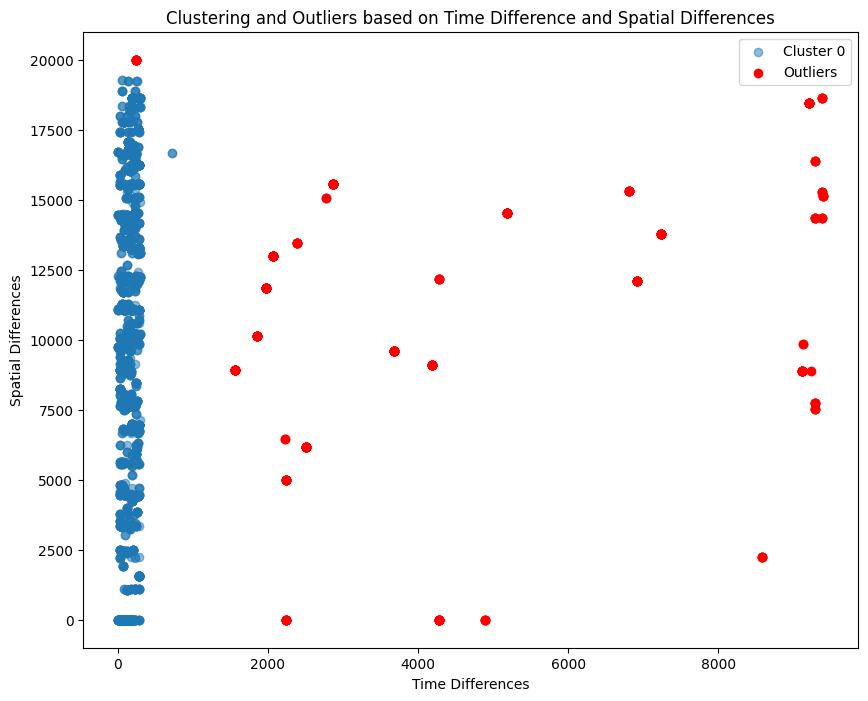

In [100]:

fig, ax = plt.subplots(figsize=(10, 8))

# Find the cluster labels
cluster_labels = np.unique(labels)

for cluster_label in cluster_labels[cluster_labels != -1]:
    cluster_points = sampletmsd[labels == cluster_label]
    ax.scatter(cluster_points[:, 2], cluster_points[:, 1], alpha=0.5, label=f'Cluster {cluster_label}')

# outliers
outlier_points = sampletmsd[outlier_indices]
print(len(outlier_points))
ax.scatter(outlier_points[:, 2], outlier_points[:, 1], c='red', label='Outliers')

plt.xlabel('Time Differences')
plt.ylabel('Spatial Differences')
plt.title('Clustering and Outliers based on Time Difference and Spatial Differences')
plt.legend()
plt.show()

We do the same thing, but with the average of the values for each identical source

In [101]:
grouped_data = onlytmdist.groupby('source').mean()

In [102]:
grouped_data.head()

,spatial_differences,differenza_tempo
source,,
18.000000,6707.695400,142.233021
92.000000,6160.822968,122.065749
166.000000,8266.059195,1682.842742
240.000000,9457.354182,115.539635
314.000000,9725.535456,400.676991


In [103]:
data_position_gr = grouped_data.astype(float)

In [104]:
samplegr = np.array(data_position_gr.values.tolist())

# DBSCAN instance
dbscan = DBSCAN(eps=1281, min_samples=11)  #Adjust the parameters eps and min_samples according to your requirements
labels = dbscan.fit_predict(samplegr)
# Identify the outliers (points labeled as -1)
outlier_indices_gr = np.where(labels == -1)[0]

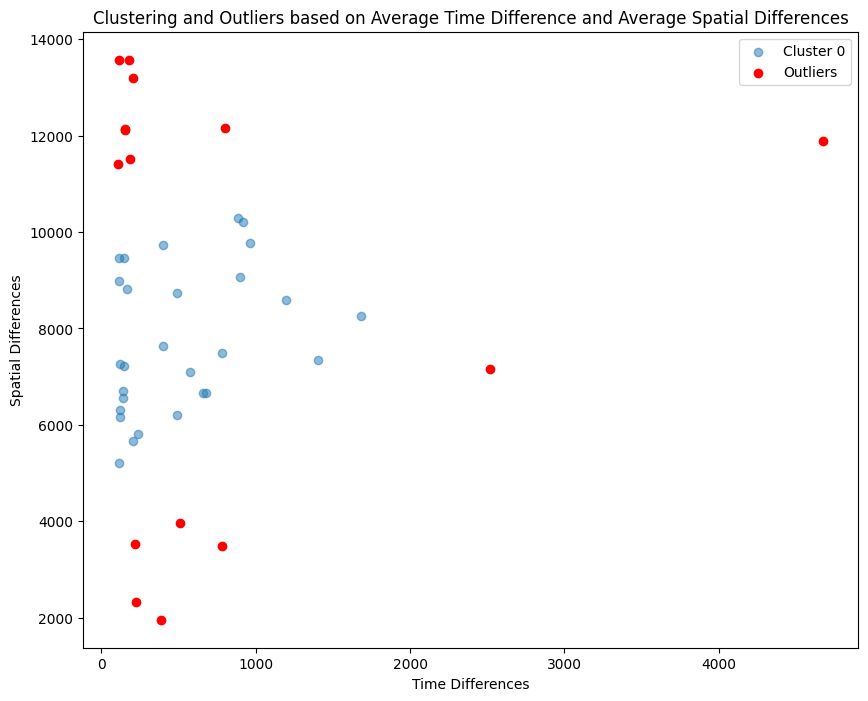

In [105]:

fig, ax = plt.subplots(figsize=(10, 8))

# Find the cluster labels
cluster_labels_gr = np.unique(labels)

for cluster_label in cluster_labels_gr[cluster_labels_gr != -1]:
    cluster_points_gr = samplegr[labels == cluster_label]
    ax.scatter(cluster_points_gr[:, 1], cluster_points_gr[:, 0], alpha=0.5, label=f'Cluster {cluster_label}')

# outliers
outlier_points_gr = samplegr[outlier_indices_gr]
#print(outlier_points_gr)
ax.scatter(outlier_points_gr[:, 1], outlier_points_gr[:, 0], c='red', label='Outliers')

plt.xlabel('Time Differences')
plt.ylabel('Spatial Differences')
plt.title('Clustering and Outliers based on Average Time Difference and Average Spatial Differences')
plt.legend()
plt.show()

We do the same thing, but with the dirty dataset.

In [106]:
dataset.head()

,source,messageID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType
0,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487690674,114631390,800001.000000,94605409815488.000000,0.000000
1,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120,114603240,800001.000000,94605409815488.000000,0.000000
2,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120,114603240,800001.000000,94605409815488.000000,0.000000
3,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120,114603240,800001.000000,94605409815488.000000,0.000000
4,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120,114603240,800001.000000,94605409815488.000000,0.000000


In [107]:
denm_fil_dirt = dataset[dataset['situation_eventType'] == 97]

In [108]:
 # 1. SimTime starts from zero, we need it in ms TAI format
tai_sync = datetime.strptime('2004-01-01 00:00:00', '%Y-%m-%d %H:%M:%S') 
# The former value is usually based on your local timezone. We need to convert to UTC as the time used in the dataset
utc_tai_sync = datetime.utcfromtimestamp(tai_sync.timestamp()) 
temp_start_time = datetime.strptime('2017-06-26 12:00:00', '%Y-%m-%d %H:%M:%S')
new_start_time = (temp_start_time.timestamp()*1000) - (utc_tai_sync.timestamp() * 1000) 
denm_fil_dirt['message_reception_time'] =  (denm_fil_dirt['simulation_time']*1000) + new_start_time
datatimeCAM['message_reception_time'] =  (datatimeCAM['simulationTime']*1000) + new_start_time

C:\Users\Acer\AppData\Local\Temp\ipykernel_17500\3229470154.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denm_fil_dirt['message_reception_time'] =  (denm_fil_dirt['simulation_time']*1000) + new_start_time


In [109]:
denm_fil_dirt['differenza_tempo'] = (denm_fil_dirt['message_reception_time'] - denm_fil_dirt['detection_time'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_17500\2316560466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denm_fil_dirt['differenza_tempo'] = (denm_fil_dirt['message_reception_time'] - denm_fil_dirt['detection_time'])


In [110]:
denm_fil_dirt = denm_fil_dirt.apply(calculate_spatial_differences, axis=1)

In [111]:
denm_fil_dirt['spatial_differences'] = denm_fil_dirt['spatial_differences'].apply(lambda x: float(x[0]))

In [112]:
denm_fil_dirt.head()

,source,messageID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType,message_reception_time,differenza_tempo,spatial_differences
0,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487690674.000000,114631390.000000,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,8526.655771
1,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,12293.039660
2,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,12293.039660
3,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,12293.039660
4,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,114603240.000000,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,12293.039660


In [113]:
# Assuming denm_fil_dirt is your DataFrame
selected_columns = denm_fil_dirt[['source',  'spatial_differences', 'differenza_tempo']]


In [114]:
selected_columns.head()

,source,spatial_differences,differenza_tempo
0,166.000000,8526.655771,38.700012
1,166.000000,12293.039660,38.700012
2,166.000000,12293.039660,38.700012
3,166.000000,12293.039660,38.700012
4,166.000000,12293.039660,38.700012


In [115]:
sampleD = np.array(selected_columns.values.tolist())

In [116]:
# DBSCAN instance
dbscan = DBSCAN(eps=1400, min_samples=100)  #Adjust the parameters eps and min_samples according to your requirements

labels = dbscan.fit_predict(sampleD)
# Identify the outliers (points labeled as -1)
outlier_indices_D = np.where(labels == -1)[0]

313


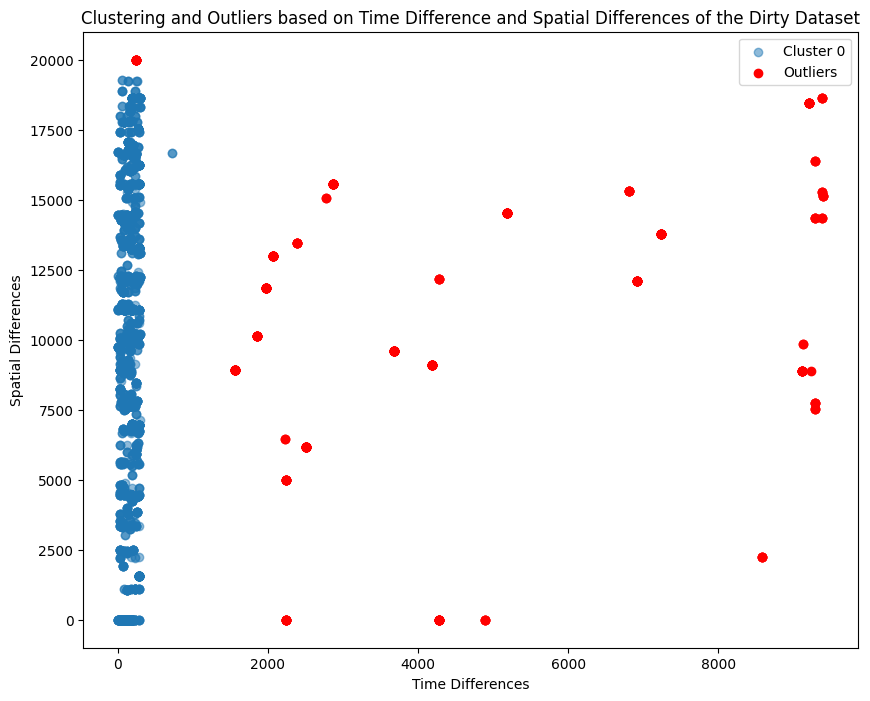

In [117]:
fig, ax = plt.subplots(figsize=(10, 8))

# Find the cluster labels
cluster_labels_D = np.unique(labels)

for cluster_label in cluster_labels_D[cluster_labels_D != -1]:
    cluster_points_D = sampleD[labels == cluster_label]
    ax.scatter(cluster_points_D[:, 2], cluster_points_D[:, 1], alpha=0.5, label=f'Cluster {cluster_label}')

# outliers
outlier_indices_D = np.where(labels == -1)[0]
outlier_points_D = sampleD[outlier_indices_D]
print(len(outlier_points_D))
ax.scatter(outlier_points_D[:, 2], outlier_points_D[:, 1], c='red', label='Outliers')

plt.xlabel('Time Differences')
plt.ylabel('Spatial Differences')
plt.title('Clustering and Outliers based on Time Difference and Spatial Differences of the Dirty Dataset')
plt.legend()
plt.show()

In [118]:
selected_columns['malicious'] = False  
selected_columns.loc[selected_columns.index[outlier_indices_D], 'malicious'] = True  


C:\Users\Acer\AppData\Local\Temp\ipykernel_17500\3454944873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['malicious'] = False


In [119]:
selected_columns.head()

,source,spatial_differences,differenza_tempo,malicious
0,166.000000,8526.655771,38.700012,False
1,166.000000,12293.039660,38.700012,False
2,166.000000,12293.039660,38.700012,False
3,166.000000,12293.039660,38.700012,False
4,166.000000,12293.039660,38.700012,False


In [120]:
malicious_rows = selected_columns[selected_columns['malicious'] == True]
print(len(malicious_rows))

313


In [121]:
df = pd.concat([denm_fil_dirt, selected_columns], axis=1)

In [122]:
df.head()

,source,messageID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,...,eventPos_alt,relevanceDistance,stationType,message_reception_time,differenza_tempo,spatial_differences,source,spatial_differences,differenza_tempo,malicious
0,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487690674.000000,...,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,8526.655771,166.000000,8526.655771,38.700012,False
1,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,...,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,12293.039660,166.000000,12293.039660,38.700012,False
2,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,...,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,12293.039660,166.000000,12293.039660,38.700012,False
3,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,...,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,12293.039660,166.000000,12293.039660,38.700012,False
4,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,...,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,12293.039660,166.000000,12293.039660,38.700012,False


We do the same thing, but with the average of the values for each identical source

In [123]:
grouped_data_dirty = selected_columns.groupby('source').mean()

In [124]:
grouped_data_dirty.head()

,spatial_differences,differenza_tempo,malicious
source,,,
18.000000,6707.695400,142.233021,0.000000
92.000000,6160.822968,122.065749,0.000000
166.000000,8233.867880,1682.842742,0.256410
240.000000,9457.354182,115.539635,0.000000
314.000000,9725.535456,400.676991,0.038462


In [125]:
data_position_grD = grouped_data_dirty.astype(float)

In [126]:
samplegrD = np.array(data_position_grD.values.tolist())

# DBSCAN instance
dbscan = DBSCAN(eps=1281, min_samples=11)  #Adjust the parameters eps and min_samples according to your requirements

labels = dbscan.fit_predict(samplegrD)
# Identify the outliers (points labeled as -1)
outlier_indices_grD = np.where(labels == -1)[0]

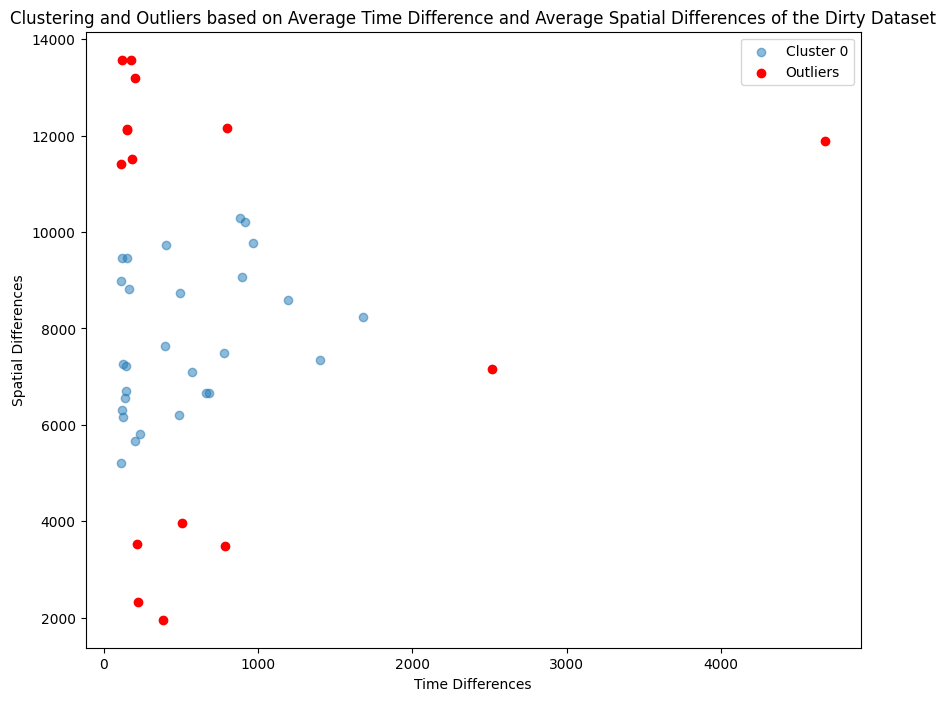

In [127]:

fig, ax = plt.subplots(figsize=(10, 8))

# Find the cluster labels
cluster_labels_grD = np.unique(labels)

for cluster_label in cluster_labels_grD[cluster_labels_grD != -1]:
    cluster_points_grD = samplegrD[labels == cluster_label]
    ax.scatter(cluster_points_grD[:, 1], cluster_points_grD[:, 0], alpha=0.5, label=f'Cluster {cluster_label}')

# outliers
outlier_points_grD = samplegrD[outlier_indices_grD]
ax.scatter(outlier_points_grD[:, 1], outlier_points_grD[:, 0], c='red', label='Outliers')

plt.xlabel('Time Differences')
plt.ylabel('Spatial Differences')
plt.title('Clustering and Outliers based on Average Time Difference and Average Spatial Differences of the Dirty Dataset')
plt.legend()
plt.show()

10- Labeling Data using only the Dirty Dataset

LOF (Local Outlier Factor) is an anomaly detection algorithm that measures the relative density of data points compared to their neighbors. It identifies outliers by calculating the local density of each point and identifying those with significantly lower density, suggesting they are anomalies in the dataset. 

In [128]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

sampleD = np.array(data_positionDIRTY.values.tolist())
feature_to_use = 1

#Local Outlier Factor (LOF)
contamination = 0.002
lof = LocalOutlierFactor(n_neighbors=40, contamination=contamination)

# Predict outliers
outlier_predictions = lof.fit_predict(sampleD[:, feature_to_use].reshape(-1, 1))

outliers = sampleD[outlier_predictions == -1]

C:\Users\Acer\AppData\Local\Temp\ipykernel_17500\4146600743.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  id_colors = plt.cm.get_cmap('hsv', num_ids)


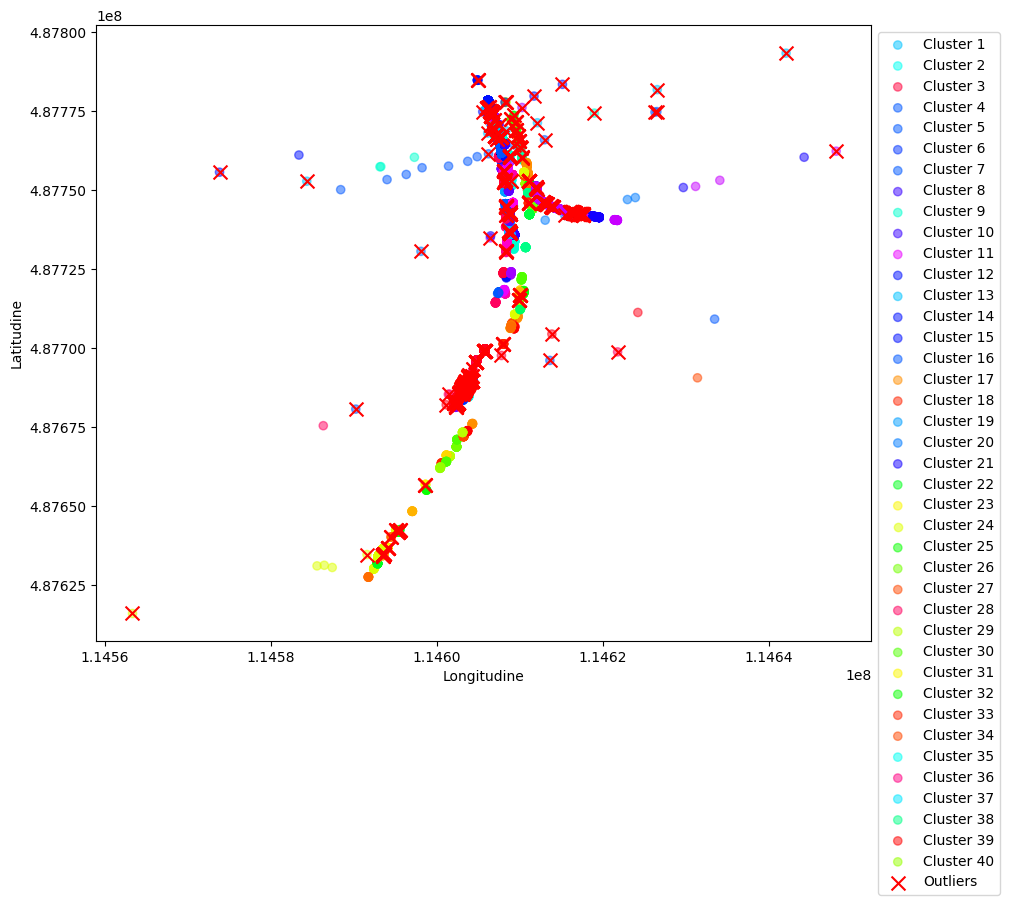

In [129]:
data_array = np.array(sampleD)
outliers = np.array(outliers)
unique_ids = np.unique(data_array[:, 0]).astype(int)
num_ids = len(unique_ids)
id_colors = plt.cm.get_cmap('hsv', num_ids)
id_color_dict = {unique_ids[i]: id_colors(i) for i in range(num_ids)}
fig, ax = plt.subplots(figsize=(10, 8))
for i, cluster in enumerate(clustersD):
        cluster_data = data_array[cluster]
        cluster_ids = cluster_data[:, 0].astype(int)
        cluster_colors = [id_color_dict[cluster_id] for cluster_id in cluster_ids]
        ax.scatter(cluster_data[:, 2], cluster_data[:, 1], c=cluster_colors, alpha=0.5, label=f'Cluster {i+1}')
ax.scatter(outliers[:, 2], outliers[:, 1], c='red', marker='x', s=100, label='Outliers')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')
plt.show()

In [130]:
datadirty.head()

,source,eventPos_lat,eventPos_long,eventPos_alt
0,166,487690674,114631390,800001
1,166,487672120,114603240,800001
2,166,487672120,114603240,800001
3,166,487672120,114603240,800001
4,166,487672120,114603240,800001


In [131]:
# Add the 'malicious' column to the DataFrame
datadirty['malicious'] = outlier_predictions == -1

C:\Users\Acer\AppData\Local\Temp\ipykernel_17500\1980456585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadirty['malicious'] = outlier_predictions == -1


In [132]:
malicious_rows = datadirty[datadirty['malicious'] == True]
print(len(malicious_rows))


1188


In [133]:
malicious_rows = datadirty[datadirty['malicious'] == False]
print(malicious_rows)

        source  eventPos_lat  eventPos_long  eventPos_alt  malicious
0          166     487690674      114631390        800001      False
1          166     487672120      114603240        800001      False
2          166     487672120      114603240        800001      False
3          166     487672120      114603240        800001      False
4          166     487672120      114603240        800001      False
...        ...           ...            ...           ...        ...
595987    3052     487682610      114602500        800001      False
595988    3126     487682780      114602090        800001      False
595989    3052     487682610      114602500        800001      False
595990    3126     487682780      114602090        800001      False
595991    3052     487682610      114602500        800001      False

[594804 rows x 5 columns]


11. Comparing and combining the two outliers detections

In [134]:
df2 = pd.concat([dataset, datadirty], axis=1)

In [135]:
df2.head()

,source,messageID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,eventPos_long,eventPos_alt,relevanceDistance,stationType,source,eventPos_lat,eventPos_long,eventPos_alt,malicious
0,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487690674,114631390,800001.000000,94605409815488.000000,0.000000,166,487690674,114631390,800001,False
1,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120,114603240,800001.000000,94605409815488.000000,0.000000,166,487672120,114603240,800001,False
2,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120,114603240,800001.000000,94605409815488.000000,0.000000,166,487672120,114603240,800001,False
3,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120,114603240,800001.000000,94605409815488.000000,0.000000,166,487672120,114603240,800001,False
4,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120,114603240,800001.000000,94605409815488.000000,0.000000,166,487672120,114603240,800001,False


In [136]:
df2 = df2[df2['situation_eventType'] == 97]

In [137]:
numero_colonne_diverse = (df['malicious'] != df2['malicious']).any().sum()

print(numero_colonne_diverse)

1


In [138]:
righe_differenti = df[df['malicious'] != df2['malicious']]
malicious_ro = righe_differenti[righe_differenti['malicious'] == True]
# Print all entries with the 'malicious' parameter different
print(malicious_ro)
print(len(malicious_ro))

            source  messageID  situation_informationQ  situation_eventType  \
9300    906.000000   1.000000                1.000000            97.000000   
9301    906.000000   1.000000                1.000000            97.000000   
9302    906.000000   1.000000                1.000000            97.000000   
9303    906.000000   1.000000                1.000000            97.000000   
9304    906.000000   1.000000                1.000000            97.000000   
...            ...        ...                     ...                  ...   
306779 2978.000000   1.000000                1.000000            97.000000   
312353 2534.000000   1.000000                1.000000            97.000000   
312354 2534.000000   1.000000                1.000000            97.000000   
312355 2534.000000   1.000000                1.000000            97.000000   
312356 2534.000000   1.000000                1.000000            97.000000   

        location_speed  location_heading      detection_time  \

In [139]:
combined_df = pd.DataFrame()
combined_df = df.copy()  

combined_df['malicious'] = df['malicious'] | df2['malicious'] 

In [140]:
combined_df.head()

,source,messageID,situation_informationQ,situation_eventType,location_speed,location_heading,detection_time,reference_time,simulation_time,eventPos_lat,...,eventPos_alt,relevanceDistance,stationType,message_reception_time,differenza_tempo,spatial_differences,source,spatial_differences,differenza_tempo,malicious
0,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487690674.000000,...,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,8526.655771,166.000000,8526.655771,38.700012,False
1,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,...,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,12293.039660,166.000000,12293.039660,38.700012,False
2,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,...,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,12293.039660,166.000000,12293.039660,38.700012,False
3,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,...,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,12293.039660,166.000000,12293.039660,38.700012,False
4,166.000000,1.000000,1.000000,97.000000,1229.000000,80.000000,425563207100.000000,425563207100.000000,7.138700,487672120.000000,...,800001.000000,94605409815488.000000,0.000000,425563207138.700012,38.700012,12293.039660,166.000000,12293.039660,38.700012,False


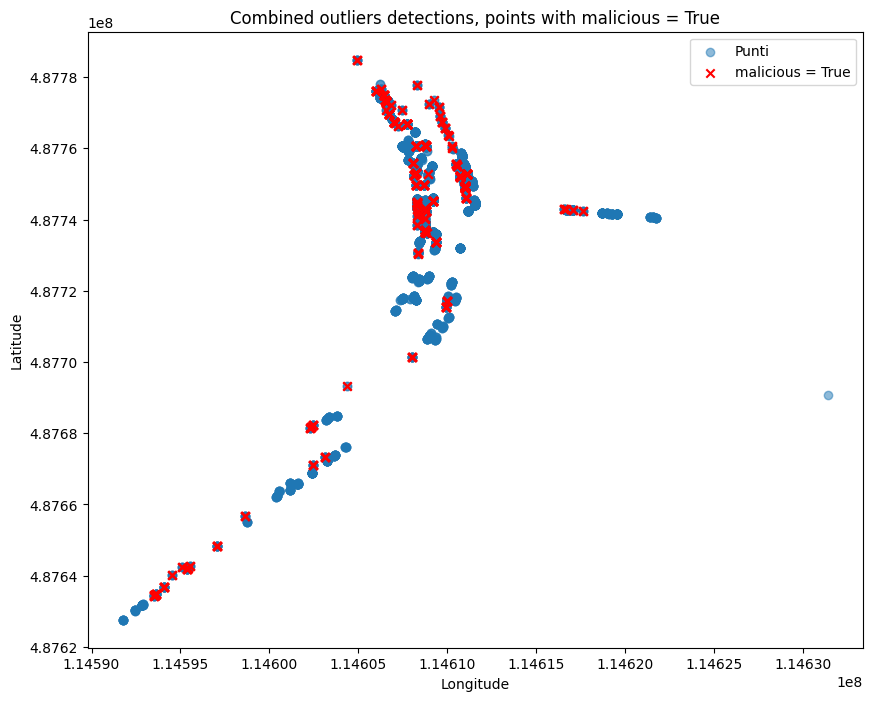

In [141]:
fig, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(combined_df['eventPos_long'], combined_df['eventPos_lat'], label='Punti', alpha=0.5)

# Markers for 'malicious' = True."
malicious_points = combined_df[combined_df['malicious'] == True]
ax2.scatter(malicious_points['eventPos_long'], malicious_points['eventPos_lat'], c='red', marker='x', label='malicious = True')


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Combined outliers detections, points with malicious = True')
plt.legend()

plt.show()
